<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/sherifmost/DeepLearning/blob/master/Labs/lab2/lab2.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab 2: Multinominal Classification

![Multinominal Classification Network](https://github.com/KhaledElTahan/DeepLearning/blob/master/Labs/lab2/multinominal_classification_net.png?raw=1)

## 2.1 Problem Statement

In this lab we will be addressing the task of multinominal classification of handwritten digits from the famous MNIST dataset. 

The MNIST dataset consists of 60,000 training images and 10,000 test images.  Our classes are the digits 0-9.

You are required to build 2 models to solve this problem:
1. A simple using fully connected layers.
2. A model using Convolutional Neural Network (CNN) before applying the simple model.

You should perform different experiments on the two models, observe the difference in **accuracy** and report them.

At the end you should perform **machine learning interpretability** and report your observations.

## 2.2 Problem Details

### 2.2.1 Dataset Loading

#### Import Needed packages

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar


2023-03-14 21:18:23.712894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 21:18:23.890569: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-14 21:18:23.918242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 21:18:23.918257: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

#### Load Dataset

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

train_images = np.expand_dims(train_images, axis=-1) / 255.
train_labels = np.int64(train_labels)

val_images = np.expand_dims(val_images, axis=-1) / 255.
val_labels = np.int64(val_labels)

#### Plot Dataset Sample

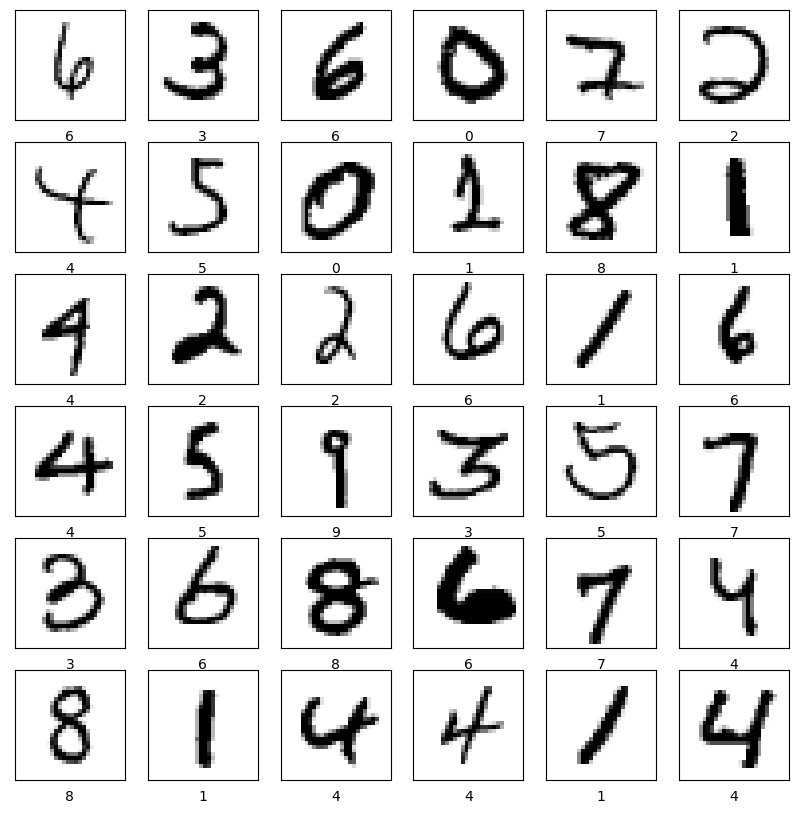

In [3]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

### 2.2.1 Fully Connected Neural Network Solution

Build a neural network, using tf.keras, consisting of 2 fully connected layers and apply this to the digit classification task, Our network will ultimately output a probability distribution over the 10 digit classes (0-9).

![Two Layer Neural Network](https://github.com/KhaledElTahan/DeepLearning/blob/master/Labs/lab2/2layer_nn.png?raw=1)

#### Define the Two-Layer Neural Network

**TODO** 

1. Define two layer neural network exactly as in the previous figure by adding two [dense layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).
2. Try different [activation functions](https://keras.io/api/layers/#layer-activations) for both layers (ReLU, Tanh, and other activations for first layer - Softmax, and other activations for output layer), and report the difference in **accuracy** and plots.
3. Try different [regularization kernerls](https://keras.io/api/layers/#layer-weight-regularizers), and [regularization layers](https://keras.io/api/layers/#regularization-layers) (L1, L2, Dropout, and other regularizations), and report the difference in **accuracy** and plots. 

In [4]:
def build_fc_model():
    fc_model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.sigmoid,),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax
                                                          )])
    return fc_model


#### Compile the Two-Layer Neural Network

**TODO** 

1. Try different [optimizers](https://keras.io/api/optimizers/), and report the difference in **accuracy** and plots.
2. For each optimizer, try different learning rates and other hyperparameters (If applicable), and report the difference in **accuracy** and plots.
3. Try different [loss functions](https://keras.io/api/losses/), and report the difference in **accuracy** and plots. 

In [50]:
fc_model = build_fc_model()

'''TODO: Experiment with different optimizers and learning rates. Think about how do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
fc_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0024),
                    loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Print the Two-Layer Neural Network Model Summary

In [51]:
fc_model.build((None, train_images.shape[1], train_images.shape[2], train_images.shape[3]))
fc_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Train the Two-Layer Neural Network

In [52]:
BATCH_SIZE = 64
EPOCHS = 10

nn_hist = fc_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.9050 - val_loss: 0.1940 - val_accuracy: 0.9421
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1651 - accuracy: 0.9521 - val_loss: 0.1302 - val_accuracy: 0.9604
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1145 - accuracy: 0.9668 - val_loss: 0.1086 - val_accuracy: 0.9659
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0855 - accuracy: 0.9752 - val_loss: 0.0896 - val_accuracy: 0.9726
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0664 - accuracy: 0.9806 - val_loss: 0.0839 - val_accuracy: 0.9745
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0520 - accuracy: 0.9852 - val_loss: 0.0826 - val_accuracy: 0.9732
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0413 - accuracy: 0.9887 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 

#### Plot the Accuracy Curve for the Two-Layer Neural Network

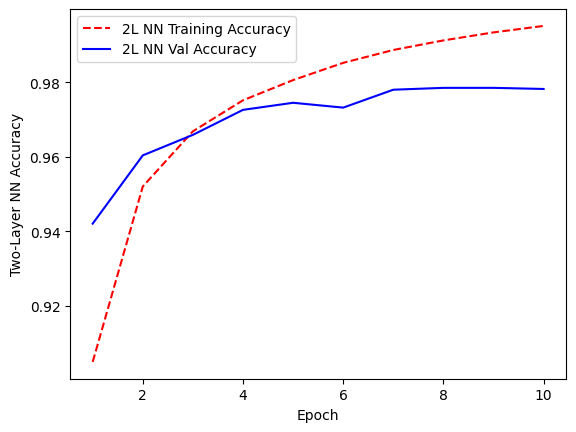

In [53]:
# Get training and validation accuracy histories
training_acc = nn_hist.history['accuracy']
val_acc = nn_hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, EPOCHS + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['2L NN Training Accuracy', '2L NN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Two-Layer NN Accuracy')
# save the figure
plt.savefig('screenshot.png')


#### Evaluate the Two-Layer Neural Network

In [54]:
val_loss, val_acc = fc_model.evaluate(val_images, val_labels)

print('Validation Accuracy:', val_acc)
print('Validation Loss:', val_loss)
# save validation accuracy and loss in a file 
with open('results.txt', 'w') as f:
    f.write("Validation Accuracy: {}".format(str(val_acc)))
    f.write("\n Validation Loss: {}".format(str(val_loss)))

313/313 [==============================] - 0s 545us/step - loss: 0.0708 - accuracy: 0.9782
Validation Accuracy: 0.9782000184059143
Validation Loss: 0.07084615528583527


Build a CNN, using tf.keras, composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9).

![CNN Model](https://github.com/KhaledElTahan/DeepLearning/blob/master/Labs/lab2/cnn_model.png?raw=1)

#### Define the Convolutional Neural Network

**TODO** 

1. Define the convolutional network exactly as in the previous figure by adding [Conv2D layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), [MaxPool2D layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D), [flatten layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), and [dense layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
2. Try different [activation functions](https://keras.io/api/layers/#layer-activations) for the layers (ReLU, Tanh, and other activations for hidden layers - Softmax, and other activations for output layer), and report the difference in **accuracy** and plots.
3. Try different [regularization kernerls](https://keras.io/api/layers/#layer-weight-regularizers), and [regularization layers](https://keras.io/api/layers/#regularization-layers) (L1, L2, Dropout, and other regularizations), and report the difference in **accuracy** and plots. 
4. Try different [convolution filter sizes](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), and report the difference in accuracy and plots.
5. For each convolution filter, try different stride lengthes, and report the difference in accuracy and plots.
6. Try different [pooling layers](https://keras.io/api/layers/pooling_layers/) (i.e. change first and second pooling layers into other different pooling layers), and report the difference in accuracy and plots.

**NOTE: Variations for the filter sizes, stride lengths and pooling layers, will mean of course that you will have to use different number of units for the next layers (i.e. you won't stick to the above mentioned figure once you try those variations).**

In [24]:
'''Note that if everything is defined correctly according to the figure up to this point, 
        the flatten layer would give us the first Dense layer which contains
        the 900 hidden units (ie: no need to define a Dense layer here, 
        only the flatten layer is needed)'''

def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        #'''TODO: Define the dimensions of the first convolutional layer according to the figure: Replace the _'''
        tf.keras.layers.Conv2D(filters=24, kernel_size=(5, 5), strides=(1, 1),activation=tf.nn.relu,
            input_shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])),

        #'''TODO: Define the pool size of the first max pooling layer according to the figure: Replace the _'''
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        #'''TODO: Define the second convolutional layer according to the figure'''
        tf.keras.layers.Conv2D(
            filters=36,
            kernel_size=(5, 5),
            strides=(1, 1),
            activation=tf.nn.relu,
        ),

        #'''TODO: Define the second max pooling layer according to the figure'''
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        #'''TODO: Define the flatten layer'''
        tf.keras.layers.Flatten(),

        #'''TODO: Define the second Dense layer according to the figure'''
        tf.keras.layers.Dense(128, activation=tf.nn.relu),  
        
        #'''TODO: Define the last Dense layer according to the figure'''
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return cnn_model


#### Compile the Convolutional Neural Network

**TODO** 

1. Try different [optimizers](https://keras.io/api/optimizers/), and report the difference in **accuracy** and plots.
2. For each optimizer, try different learning rates and other hyperparameters (If applicable), and report the difference in **accuracy** and plots.
3. Try different [loss functions](https://keras.io/api/losses/), and report the difference in **accuracy** and plots. 

In [25]:
cnn_model = build_cnn_model()

'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Print the Convolutional Neural Network Model Summary

In [26]:
cnn_model.build((None, train_images.shape[1], train_images.shape[2], train_images.shape[3]))
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 24)        624       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 36)          21636     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 36)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

#### Train the Convolutional Neural Network

In [27]:
BATCH_SIZE = 64
EPOCHS = 20

cnn_hist = cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2055 - accuracy: 0.9356 - val_loss: 0.0753 - val_accuracy: 0.9762
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0600 - accuracy: 0.9809 - val_loss: 0.0450 - val_accuracy: 0.9856
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0400 - val_accuracy: 0.9877
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0338 - val_accuracy: 0.9881
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0303 - val_accuracy: 0.9898
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 

#### Plot the Accuracy Curve for the Convolutional Neural Network

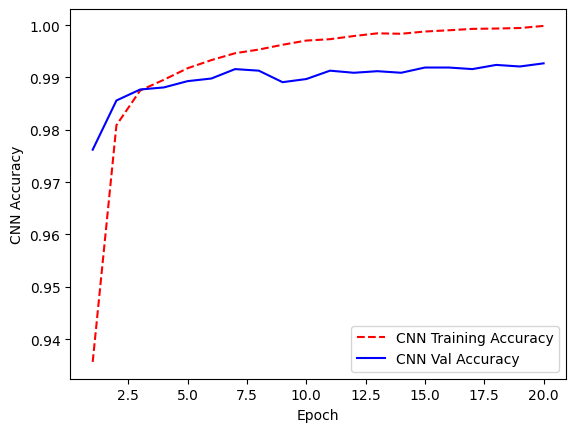

In [28]:
# Get training and validation accuracy histories
training_acc = cnn_hist.history['accuracy']
val_acc = cnn_hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, EPOCHS + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['CNN Training Accuracy', 'CNN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('CNN Accuracy')
# plt.show()

# save the figure
plt.savefig('screenshot.png')

#### Evaluate the Convolutional Neural Network

In [29]:
val_loss, val_acc = cnn_model.evaluate(val_images, val_labels)

print('Validation Accuracy:', val_acc)
print('Validation Loss:', val_loss)

# save validation accuracy and loss in a file
with open('results.txt', 'w') as f:
    f.write("Validation Accuracy: {}".format(str(val_acc)))
    f.write("\n Validation Loss: {}".format(str(val_loss)))

313/313 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9927
Validation Accuracy: 0.9926999807357788
Validation Loss: 0.03297170251607895


#### Think About the Following

**What is the highest accuracy you’re able to achieve using the CNN model, and how does the accuracy of the CNN model compare to the accuracy of the simple fully connected network?**

#### Machine Learning Interpretability

For this part, we will have a look at using SHAP for machine learning interpretability analysis.

A crucial part of studying machine learning models is understanding what they are doing to make sure that the model really understands the problem and is not overfitting the data or focusing on incorrect features. 

This helps us identify the model weaknesses and thus improve its performance on unseen data. 

One of the ways to do so is to determine and analyze the features affecting the model's prediction. You can read more about machine learning interpretability in this [article](https://towardsdatascience.com/understanding-machine-learning-interpretability-168fd7562a1a).

[SHAP](https://shap.readthedocs.io/en/latest/overviews.html) is a technique that leverages game theory to explain the prediction by identifying the contribution of each feature on the model's final decision. You can read about other techniques in this [article](https://towardsdatascience.com/three-interpretability-methods-to-consider-when-developing-your-machine-learning-model-5bf368b47fac).

For this part, we will use the **DeepExplainer** provided by SHAP for analyzing the performance of **the best CNN model** you created on the MNIST dataset. 

**You can find details about how to do so [here](https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Front%20Page%20DeepExplainer%20MNIST%20Example.html).**

##### Installing SHAP

In [59]:
%pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##### Importing and using SHAP

In [60]:
import shap
# TODO: select a random set of background samples to take an expectation over
background = shap.sample(val_images, 1000)
# TODO: Instantiate the deep explainer with the best CNN model and the background samples
e = shap.DeepExplainer(
    cnn_model,
    background
)
# Obtaining the SHAP values on the first 10 images
shap_values = e.shap_values(val_images[1:11])


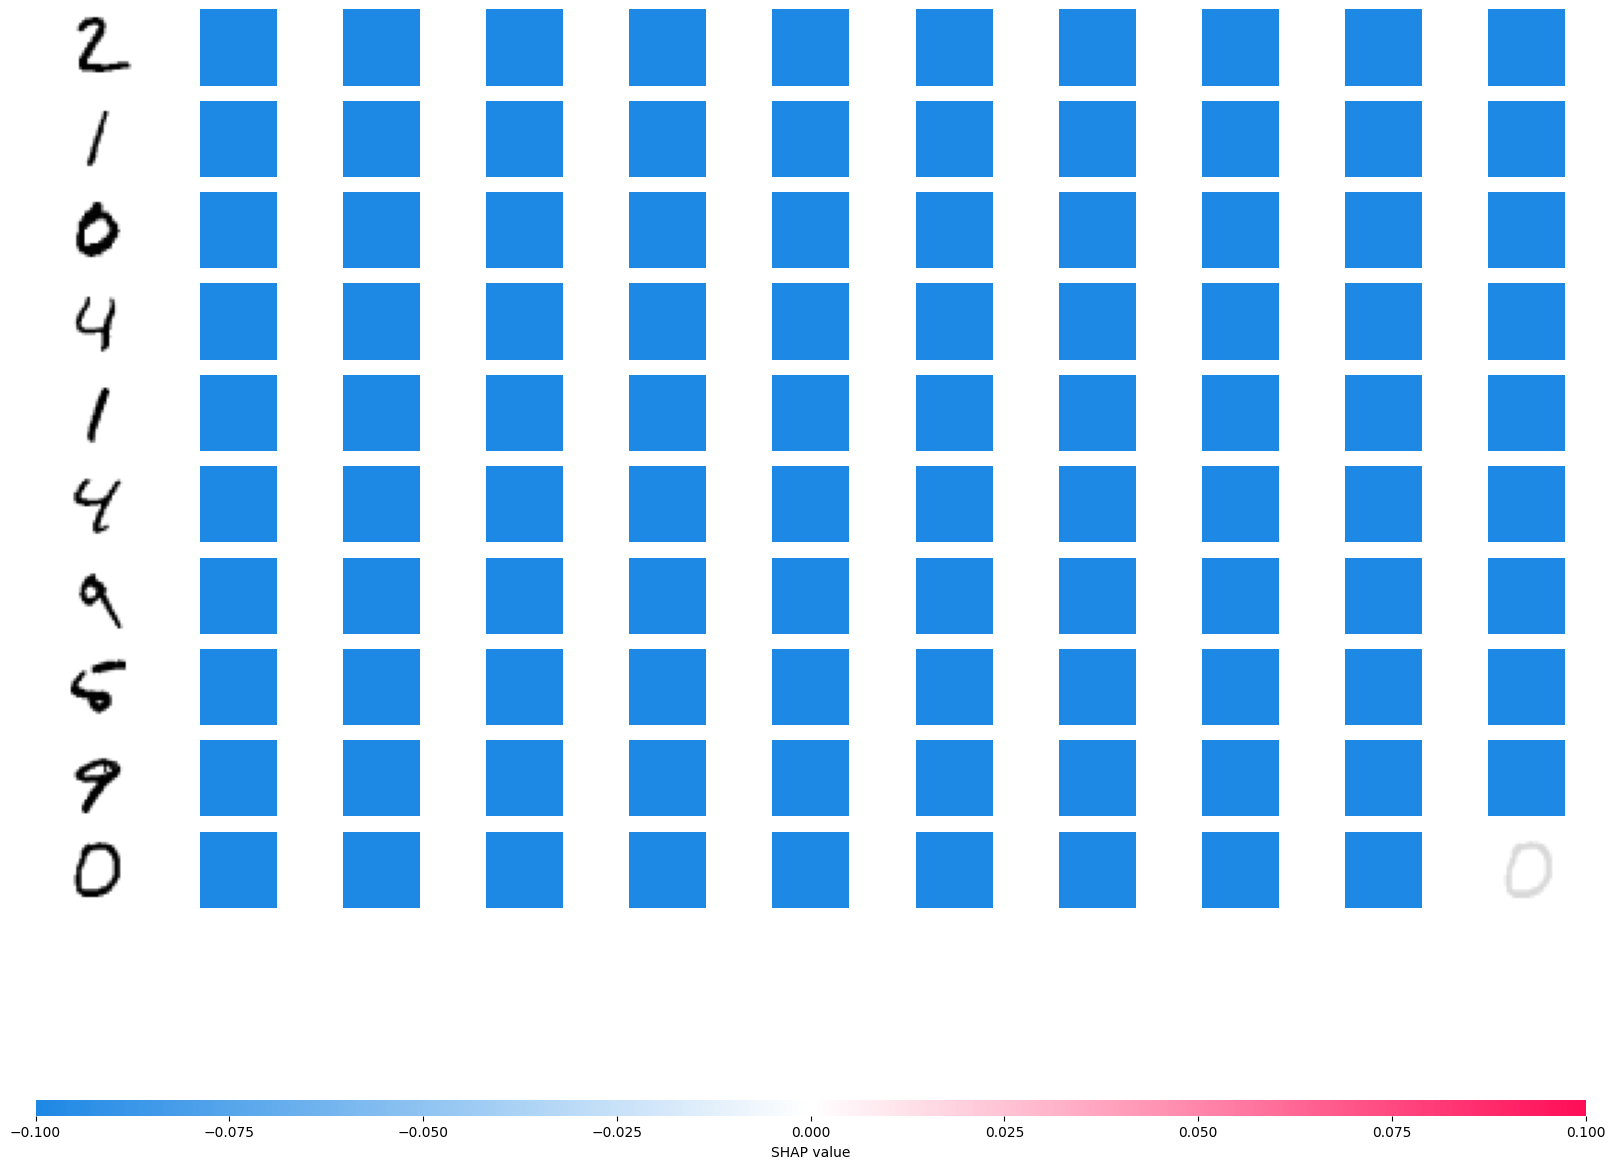

In [61]:
# plot to see where did the model concentrate to classify the images
shap.image_plot(shap_values,-val_images[1:11])

**Think about the following:** 

*What does the plot show in each entry? What can you conclude from the plot? Is the model focusing on meaningful features? Why? Why not? Are there features in certain digits that confuse the model?*

**Make sure to include the SHAP plot you obtained and your comments in the report.**

## 2.3 Conclusion

That's it! Congratulations on training a multinominal classification models.

Make sure you deliver all the requirements for the submission.